# Myntra (Buy Me That Look!)
### An Approach for recommending Fashion Products

[Research Paper](https://arxiv.org/pdf/2008.11638.pdf)

## Problem Statement

<a href="https://imgur.com/FEklYUC"><img src="https://i.imgur.com/FEklYUC.png" title="source: imgur.com" /></a>

- The rise of e-commerce websites in India has led to an increase in online shopping throughout the country. Fashion items are the most sought after in the e-commerce market. 
- A robust, effective, and efficient recommendation system for fashion items could lead to an increase in revenue, better customer engagement, and experience. What makes this approach novel is the ability to detect multiple products from a given Product Display page and recommend similar items to the user. 
- A Product Display Page (PDP), is a web-page that presents an image of the product/products worn by a model or a standalone picture of the product in a plain background. This approach helps the user to not only look for the relevant item in a single category but also to match those items with other items that go well with the specified product. The proposed solution involves a system with various modules that carry specific tasks that help in achieving the overall goal. The first module that consists of the Human Key Point Detection, looks for specific human key points like the ankle and the eyes in order to classify the image as a full-shot image i.e. an image that consists of the full body of a model. The next module is the Pose-Detector, which determines the pose/orientation of the model in the image. The pose can either be front, back, left, right or detailed. 
- The image containing the front pose of the model is then fed to the next module, it’s an Object Detection module trained to identify objects from these broad categories - top-wear, bottom-wear, outer-wear, skirts, dresses, footwear, and bags. The goal of this module is not just the identification of these objects in the image but also to localize the objects with bounding-boxes. Once the bounding boxes are obtained for a certain object, that part of the image is cropped and the semantic embeddings for the cropped image are obtained, which will help in identifying similar products from the catalog/database of products whose semantic embeddings are already known. This system helps in automatically and efficiently recommending new items to a user who has selected or shown interest in a certain product display page.


In [2]:
import selenium
import pandas as pd
import time, re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

from skimage import io
from tqdm import tqdm
from selenium import webdriver as wb
%matplotlib inline

## Scrape Images from Google (Image Search)

- To recreate the research paper, first we'll have to recreate the dataset/database of Fashion Products that are at disposal for Myntra.
- We'll use Selenium, a popular tool used for Browser automation, to automatically search for and download required images from Myntra's E-Commerce website

[Reference](https://medium.com/analytics-vidhya/web-scraping-e-commerce-sites-using-selenium-python-55fd980fe2fc)

In [2]:
# Reference:- https://medium.com/analytics-vidhya/web-scraping-e-commerce-sites-using-selenium-python-55fd980fe2fc

wd = wb.Chrome('chromedriver.exe')
search_terms = [
                "Men Topwear Formal",
                "Men Topwear Casual",
                "Men Topwear Party",
                "Women Topwear Formal",
                "Women Topwear Casual",
                "Women Topwear Party",
                "Men Bottomwear Formal",
                "Men Bottomwear Casual",
                "Men Bottomwear Party",
                "Women Bottomwear Formal",
                "Women Bottomwear Casual",
                "Women Bottomwear Party",
                "Men Footwear Formal",
                "Men Footwear Casual",
                "Men Footwear Party",
                "Women Footwear Formal",
                "Women Footwear Casual",
                "Women Footwear Party",
               ]

In [3]:
product_ids, product_urls, image_urls, descriptions, brands, genders, categories, occasions = list(), list(), list(), list(), list(), list(), list(), list()
MAX_PRODUCTS_PER_CATEGORY = 1000
for search_term in search_terms:
    search_term = search_term.lower()
    query = f"https://www.myntra.com/{search_term.replace(' ', '-')}"
    total = 0
    wd.get(query)
    next_button_found = True
    while total < MAX_PRODUCTS_PER_CATEGORY:
        time.sleep(3)
        products = wd.find_elements_by_class_name("product-base")
        for product in products:
            try:
                image = product.find_element_by_tag_name("img")
            except:
                continue
            total += 1
            product_ids.append(f"{''.join(list(x[0] for x in search_term.split()))}_{'{0:0>10}'.format(str(total))}")
            product_urls.append(product.find_element_by_tag_name("a").get_property("href"))
            image_urls.append(image.get_property("src"))
            descriptions.append(image.get_property("alt"))
            brands.append(image.get_property("alt").split()[0])
            genders.append(search_term.split()[0])
            categories.append(search_term.split()[1])
            occasions.append(search_term.split()[2])
        try:
            wd.find_element_by_class_name("pagination-next").click()
        except:
            break

In [4]:
df = pd.DataFrame()

df['product_id'] = product_ids
df['product_url'] = product_urls
df['image_url'] = image_urls
df['description'] = descriptions
df['brand'] = brands
df['gender'] = genders
df['category'] = categories
df['type'] = occasions

df.to_csv("CSVS\\myntra-fashion-products.csv", index=False)

In [5]:
df = pd.read_csv("CSVS\\myntra-fashion-products.csv")
print(f"Total Products: {df.shape[0]}")
df.head()

Total Products: 10310


product_id                                        product_url  \
0  mtf_0000000001  https://www.myntra.com/shirts/jainish/jainish-...   
1  mtf_0000000002  https://www.myntra.com/shirts/english-navy/eng...   
2  mtf_0000000003  https://www.myntra.com/shirts/ivoc/ivoc-men-bl...   
3  mtf_0000000004  https://www.myntra.com/shirts/jainish/jainish-...   
4  mtf_0000000005  https://www.myntra.com/shirts/invictus/invictu...   

                                           image_url  \
0  https://assets.myntassets.com/dpr_2,q_60,w_210...   
1  https://assets.myntassets.com/dpr_2,q_60,w_210...   
2  https://assets.myntassets.com/dpr_2,q_60,w_210...   
3  https://assets.myntassets.com/dpr_2,q_60,w_210...   
4  https://assets.myntassets.com/dpr_2,q_60,w_210...   

                                         description         brand gender  \
0  JAINISH Men Grey Classic Regular Fit Solid For...       Jainish    men   
1  English Navy Men Black Slim Fit Solid Formal S...  English-Navy    men   
2   IVOC Men Black Slim Fit Solid Smart Formal Shirt          Ivoc    men   
3  JAINISH Men Grey Classic Slim Fit Printed Form...       Jainish    men   
4  INVICTUS Men Navy Blue & White Slim Fit Pure C...      Invictus    men   

  category    type             b  
0  topwear  formal       Jainish  
1  topwear  formal  English-Navy  
2  topwear  formal          Ivoc  
3  topwear  formal       Jainish  
4  topwear  formal      Invictus

- We now have the URLs for the Landing Page for each product, hence whiile recomending similar products we can also attach the product URL that will make it convenient for buying the product.

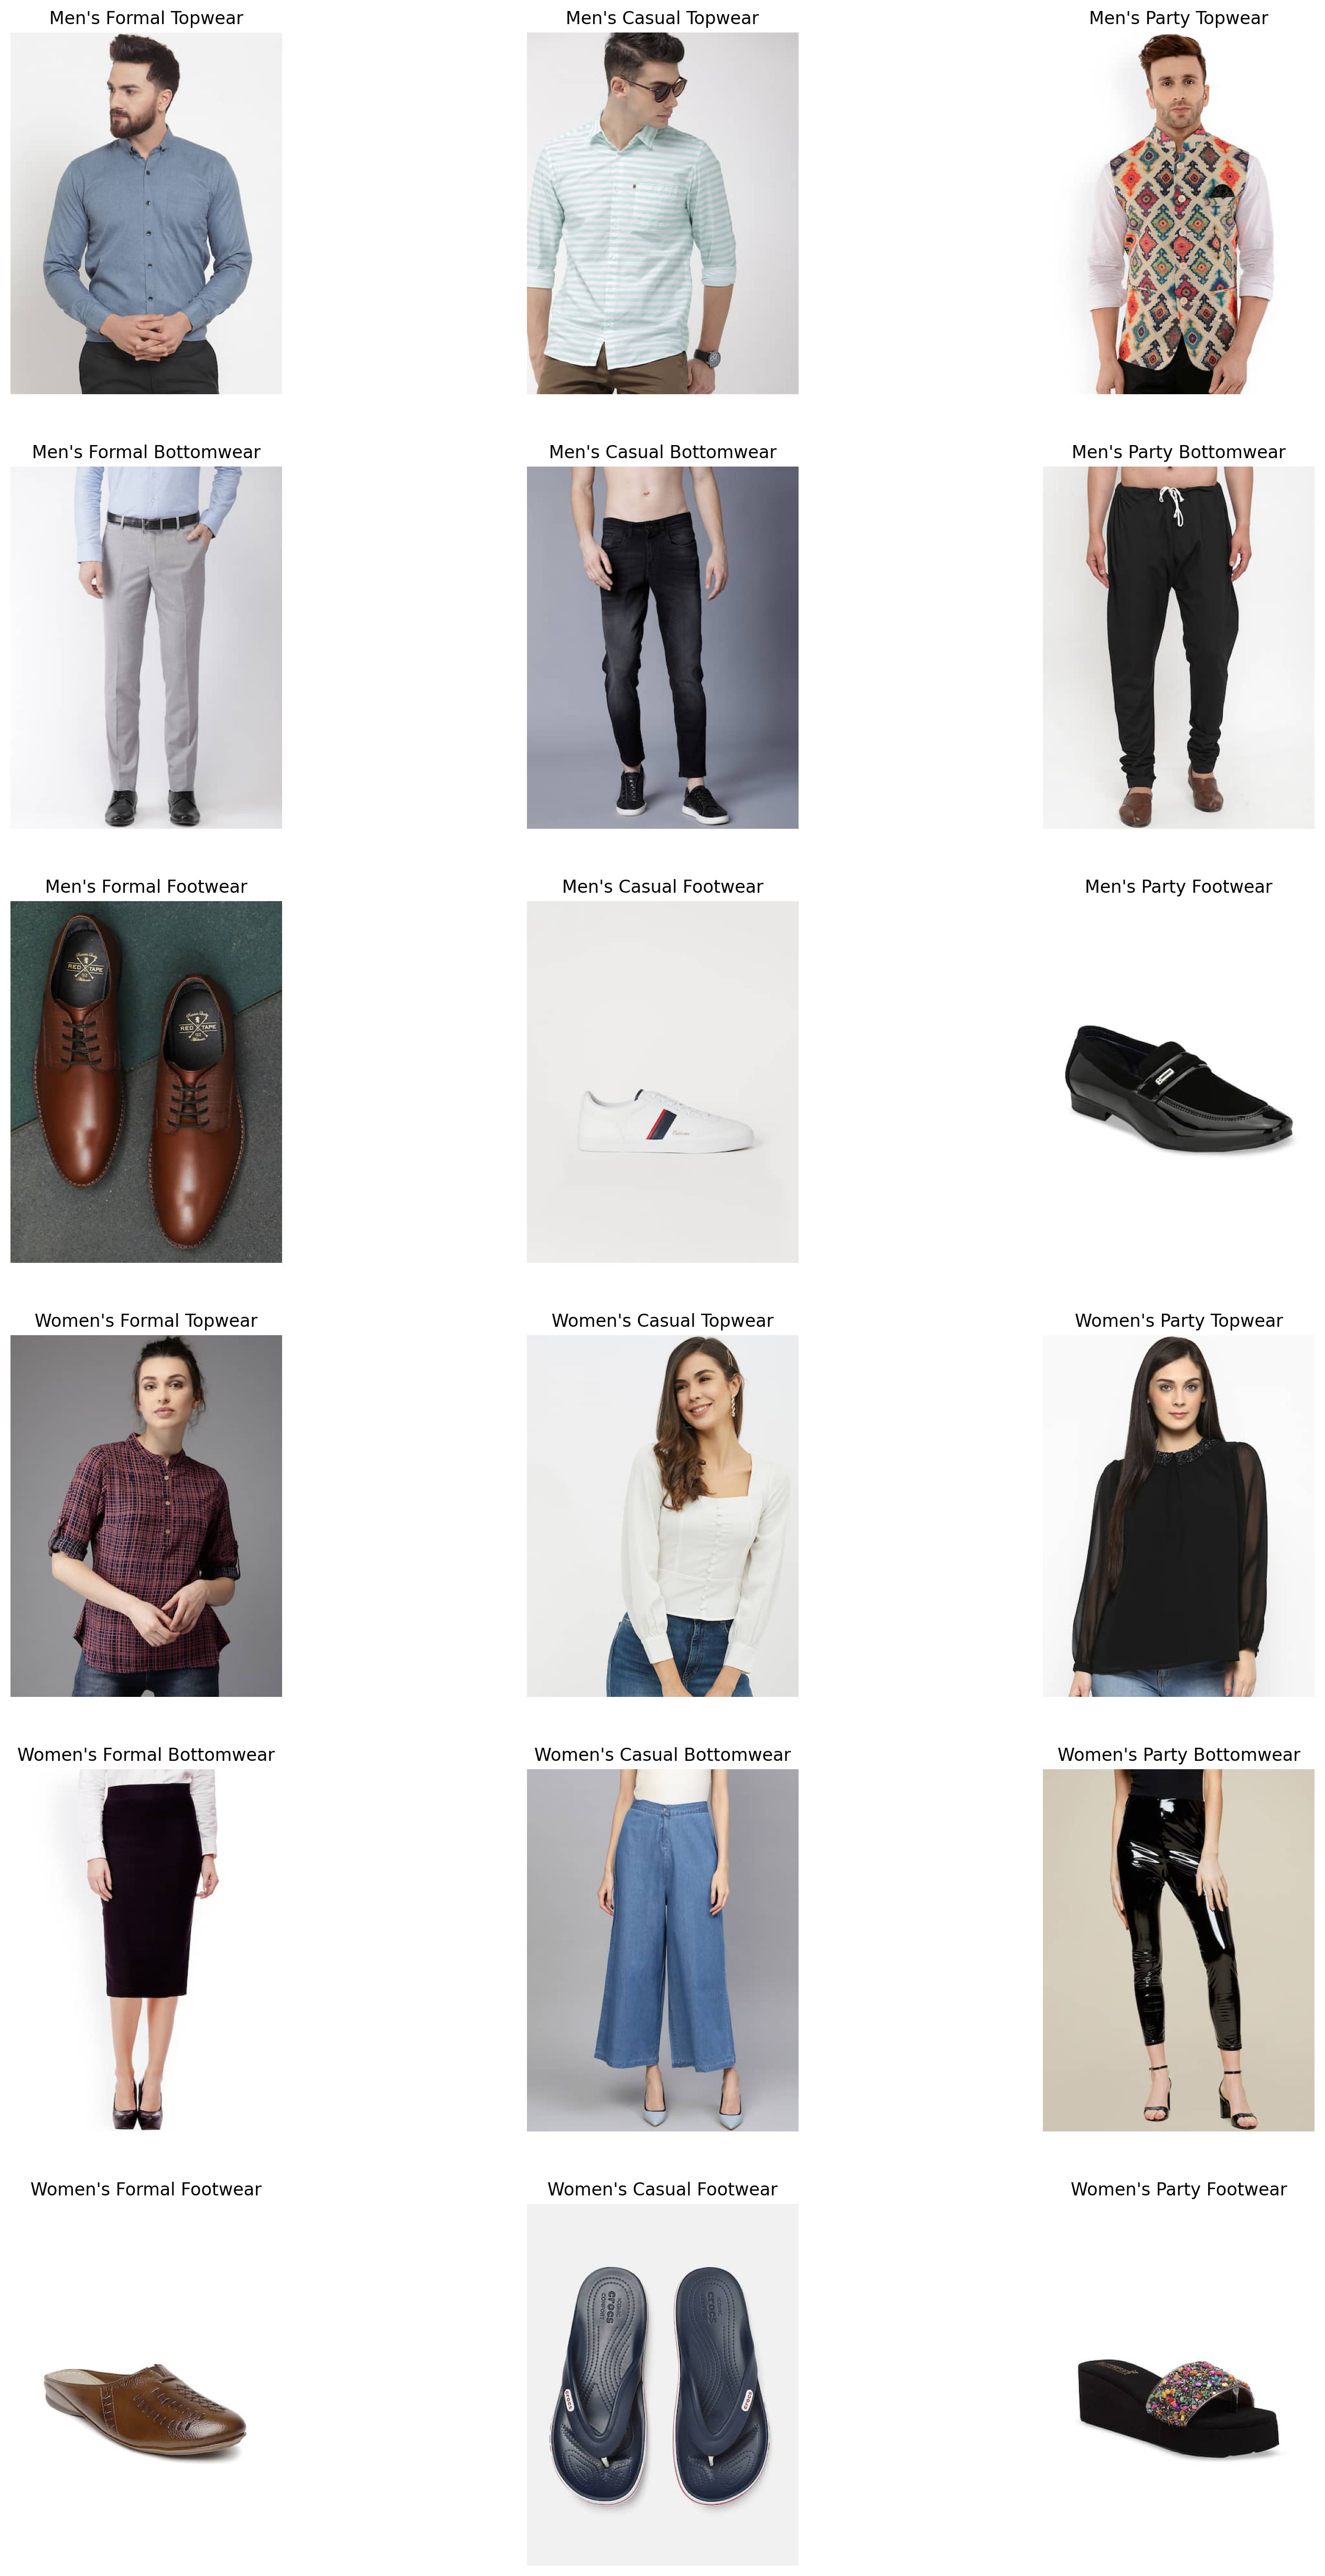

In [6]:
genders = list(df.gender.unique())
categories = list(df.category.unique())
occasions = list(df.type.unique()) 

plt.figure(figsize=(18,32), dpi=200)
i = 1
for gender in genders:
    for category in categories:
        for occasion in occasions:
            mdf = df[(df.gender == gender) & (df.category == category) & (df.type == occasion)]
            img_url = mdf.image_url.iloc[0]
            plt.subplot(6,3,i)
            plt.imshow(io.imread(img_url))
            plt.axis("off")
            plt.title(f"{gender}s {occasion} {category}".title().replace("ns", "n's"))
            i += 1

In [7]:
df.gender.value_counts()

men      5992
women    4318
Name: gender, dtype: int64

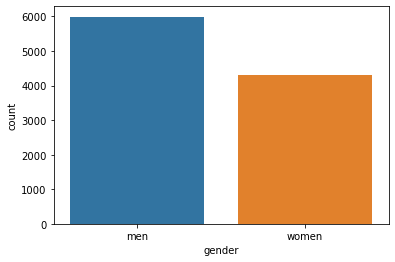

In [8]:
sns.countplot(df.gender)
plt.show()

**Observations:**
- The number of fashion products for Men and women are not distributed equally.
- Around ~6k products for Men and ~4.3k products for Women
- The database has a total of ~10.3k Fashion products.

In [9]:
df.category.value_counts()

topwear       3770
footwear      3524
bottomwear    3016
Name: category, dtype: int64

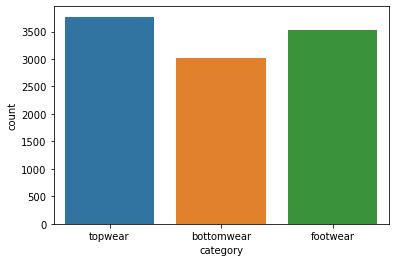

In [10]:
sns.countplot(df.category)
plt.show()

**Observations:**
- Topwears are a majority in the dataset with ~3.7k items whereas bottom wears like jeans and trousers are minority with ~3k
- The dataset also contains a healthy amount of footwears as well, around ~3.5k

In [11]:
df.type.value_counts()

casual    6029
formal    3227
party     1054
Name: type, dtype: int64

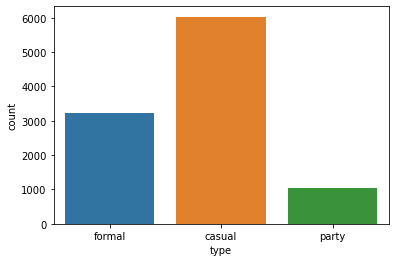

In [12]:
sns.countplot(df.type)
plt.show()

**Observations:**
- Casual clothes are a majority in the dataset with ~6k items whereas party clothes are minority with only ~1k items
- There are around ~3.2k formal fashion products.

In [13]:
combined = df.gender + "'s_" + df.type + "_" + df.category
combined.value_counts()

men's_casual_footwear        1009
men's_formal_footwear        1009
men's_formal_topwear         1008
women's_casual_bottomwear    1007
men's_casual_bottomwear      1007
women's_casual_footwear      1003
men's_casual_topwear         1002
women's_casual_topwear       1001
men's_formal_bottomwear       792
women's_party_topwear         440
women's_party_footwear        382
women's_formal_topwear        187
men's_party_topwear           132
women's_formal_bottomwear     132
women's_formal_footwear        99
women's_party_bottomwear       67
men's_party_footwear           22
men's_party_bottomwear         11
dtype: int64

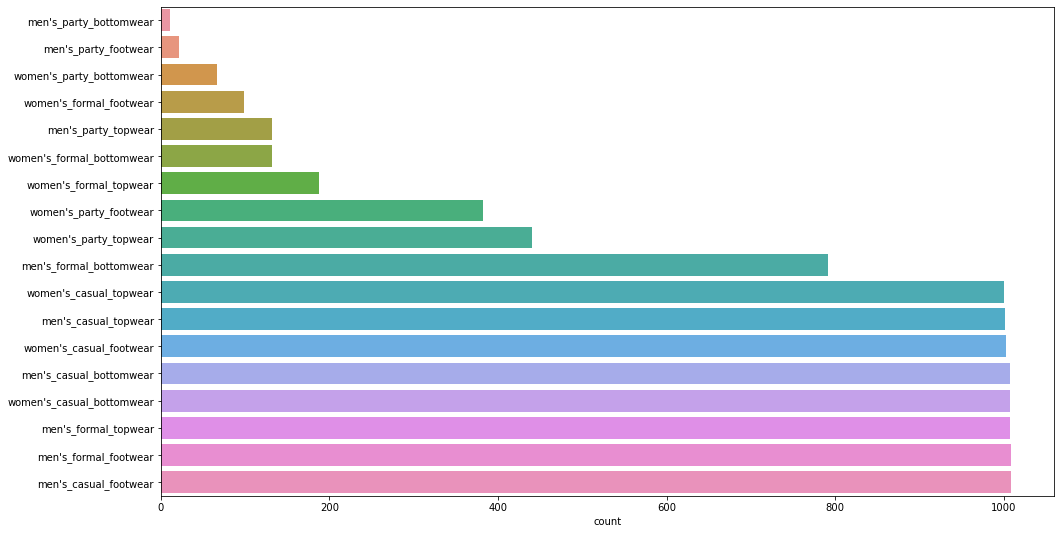

In [14]:
plt.figure(figsize=(16,9))
sns.countplot(y=sorted(combined, key=lambda x: combined.value_counts()[x]), orient='v')
plt.show()

**Observations:**
- Here we can observe the distribution across combined labels in the dataset
- Men's Casual and Formal items have more than 1000 items each, whereas Women's Casual Fashion products have around 1000 items each.
- However, products with type "Party" have the least amounts of records associated with it.

In [15]:
print("25 Most Common Brands in the Dataset: ")
df.brand.value_counts()[:25]

25 Most Common Brands in the Dataset: 


Roadster          624
Louis-Philippe    326
Mast--Harbour     281
Rapawalk          215
Highlander        209
Van-Heusen        168
Dressberry        149
Arrow             145
Herenow           143
Metro             136
Park-Avenue       134
Peter-England     130
Hm                126
Mango             110
Flying-Machine    109
Us-Polo-Assn      102
Puma               97
Levis              93
Bata               91
Blackberrys        91
Wrogn              89
Allen-Solly        86
Khadims            86
Sassafras          82
Mochi              80
Name: brand, dtype: int64